In [0]:
#Import Modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import joblib
sns.set()

In [30]:
#import Dataset
dataset = pd.read_csv('/content/drive/My Drive/GRANAT/Price Prediction/Price Prediction.csv')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [31]:
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


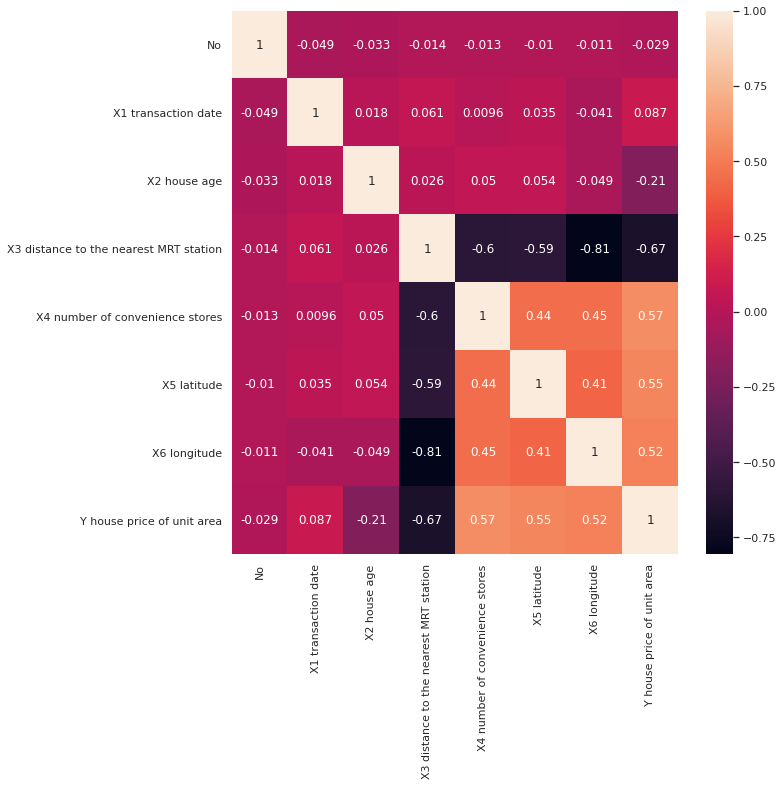

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

In [0]:
Xdata = dataset.drop(['No', 'Y house price of unit area'], axis=1)
Ydata = dataset['Y house price of unit area']

In [35]:
est = ExtraTreesRegressor()
fe = RFE(est, 3)
fit = fe.fit(Xdata, Ydata)

print("jumlah feature:", fit.n_features_)
print("feature Terpilih:", fit.support_)
print("Rangking Feature:", fit.ranking_)

jumlah feature: 3
feature Terpilih: [False False  True  True  True False]
Rangking Feature: [4 2 1 1 1 3]


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.2)

In [37]:
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
82,2013.083,13.2,150.9347,7,24.96725,121.54252
154,2013.500,16.9,4066.5870,0,24.94297,121.50342
314,2013.250,3.7,577.9615,6,24.97201,121.54722
178,2013.500,13.1,1144.4360,4,24.99176,121.53456
392,2013.083,42.7,443.8020,6,24.97927,121.53874
...,...,...,...,...,...,...
83,2012.917,25.3,2707.3920,3,24.96056,121.50831
388,2013.500,10.4,2251.9380,4,24.95957,121.51353
177,2013.083,33.0,181.0766,9,24.97697,121.54262
140,2013.250,16.2,289.3248,5,24.98203,121.54348


In [0]:
Dt = DecisionTreeRegressor()
Rf = RandomForestRegressor()

In [0]:
Dt_fit = Dt.fit(X_train, Y_train)
Rf_fit = Rf.fit(X_train, Y_train)

In [0]:
predic_Dt = Dt_fit.predict(X_test)
predic_Rf = Rf_fit.predict(X_test)

In [41]:
print("MSE Dt", mean_squared_error(Y_test, predic_Dt))
print("MSE Rf", mean_squared_error(Y_test, predic_Rf))

MSE Dt 172.86162650602412
MSE Rf 123.5918747673359


In [0]:
params = {'n_estimators': [10,100,1000],
          'max_depth': [4,6,8],
          'min_samples_split': [0.15, 0.2, 0.25]}

In [0]:
GS = GridSearchCV(Rf, param_grid=params, cv=4, verbose=1)

In [51]:
GSModel = GS.fit(X_train, Y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   60.0s finished


In [52]:
GSModel.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.15, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
bestmodel = RandomForestRegressor(n_estimators=1000, min_samples_split=0.15, max_depth=6)

In [0]:
bestmodel_fit = bestmodel.fit(X_train, Y_train)

In [0]:
predict_bestmodel = bestmodel_fit.predict(X_test)

In [56]:
mean_squared_error(Y_test, predict_bestmodel)

122.66660105394813

In [60]:
joblib.dump(bestmodel_fit, '/content/drive/My Drive/GRANAT/Price Prediction/best_model.sav')

['/content/drive/My Drive/GRANAT/Price Prediction/best_model.sav']

In [0]:
model_load = joblib.load('/content/drive/My Drive/GRANAT/Price Prediction/best_model.sav')